In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#
%cd "/content/drive/MyDrive/IA/IA 2/Pruebas"
!ls

Mounted at /content/drive
/content/drive/MyDrive/IA/IA 2/Pruebas
 Examples   images  'Load model.ipynb'	 model.ipynb   poke.h5


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import numpy as np
import os

In [ ]:
# tags for the classes
labels = {
    0: 'anime',
    1: 'cartoon',
    2: 'human',
}

In [ ]:
# load the model
model = load_model('poke.h5')

In [ ]:
# load and predict images
prediction = []
original = []
image = []
count = 0
examples_path = 'Examples'

# we go through each folder in the examples path
for i in os.listdir(examples_path):
    # we go through each item in the current folder
    for item in os.listdir(os.path.join(examples_path, i)):
        # load the image and resize it to 200x200
        img = tf.keras.utils.load_img(os.path.join(examples_path, i, item), target_size=(200, 200))
        # the image is stored in an array for later visualization
        image.append(img)
        # we perform transformations on the image so that it can be used
        img = np.array(img)
        ##img = img / 255.0
        # we specify the dimensions that the model expects
        img = img.reshape(1,200,200,3)
        # Model prediction
        predict = model.predict(img)
        # Get the index of the highest value in the prediction
        predict = np.argmax(predict)
        # Store the value of that index in an array
        prediction.append(labels[predict])
        # Store the original class for later verification
        original.append(i)

1/1 [==============================] - 0s 396ms/step


In [ ]:
# Array for numbering the images
n = []
for i in range(len(image)):
    n.append(i)

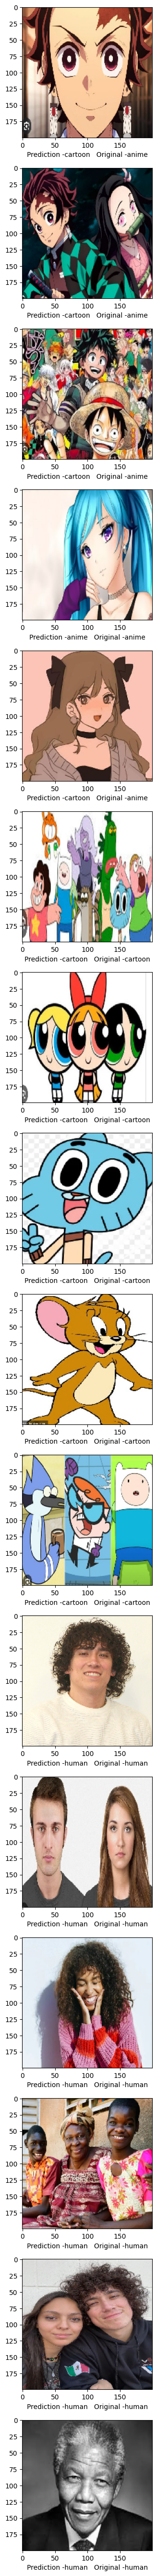

In [ ]:
# Visualization of results
fig = plt.figure(figsize = (100,100))

for i in range(len(n)):
    fig.add_subplot(30,1,i+1)
    plt.xlabel("Prediction -" + prediction[i] +"   Original -" + original[i])
    plt.imshow(image[i])
fig.tight_layout()
plt.show()